In [34]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('Branch_ID_Master.csv')
df2 = pd.read_excel('City_Master.xlsx')
loan_details = pd.read_csv('Loan_Details_transactions.csv')
loan_status = pd.read_csv('Loan_status_mapping.csv')
df5 = pd.read_excel('Postal_Code_Master.xlsx')
df6 = pd.read_excel('Region_Master.xlsx')
state_master = pd.read_excel('State_Master.xlsx')
state_region = pd.read_excel('State_Region_Mapping.xlsx')

In [35]:
state_master_region = pd.merge(state_master , state_region , on = "State_Code", how = 'left')
state_master_region["Region"].fillna("other", inplace = True)
state_master_region.drop('State Name' ,axis = 1, inplace = True)
state_master_region["Region_ID"].fillna("R5", inplace = True)
finalDf = pd.merge(loan_details , state_master_region , on = "State_Code")
newMergedDf = pd.merge(finalDf , loan_status , on = 'Loan_Id') 
newMergedDf.to_excel(r"C:\Users\tanvi.singh\Documents\finalDF2.xlsx" , index = False)

In [36]:
newMergedDf.columns

Index(['Loan_Id', 'Disbursed_Amount', 'Asset_Cost', 'ltv', 'Branch_Id',
       'City_Code', 'State_Code', 'Postal_Code', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'State_Name', 'Region',
       'Region_ID', 'Loan_Default'],
      dtype='object')

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\tanvi.singh\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


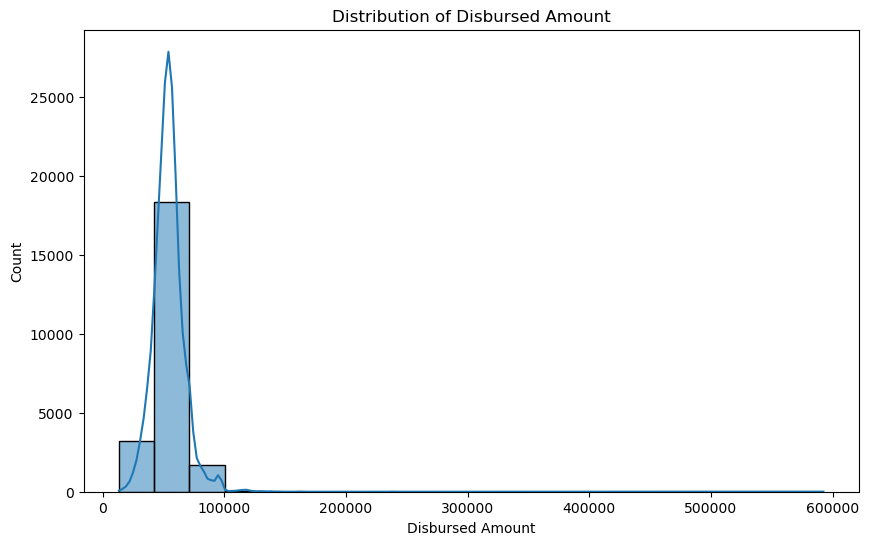

In [23]:
# Distribution of Disbursed Amount
plt.figure(figsize=(10, 6))
sns.histplot(newMergedDf['Disbursed_Amount'], bins=20, kde=True)
plt.title('Distribution of Disbursed Amount')
plt.xlabel('Disbursed Amount')
plt.ylabel('Count')
plt.show()


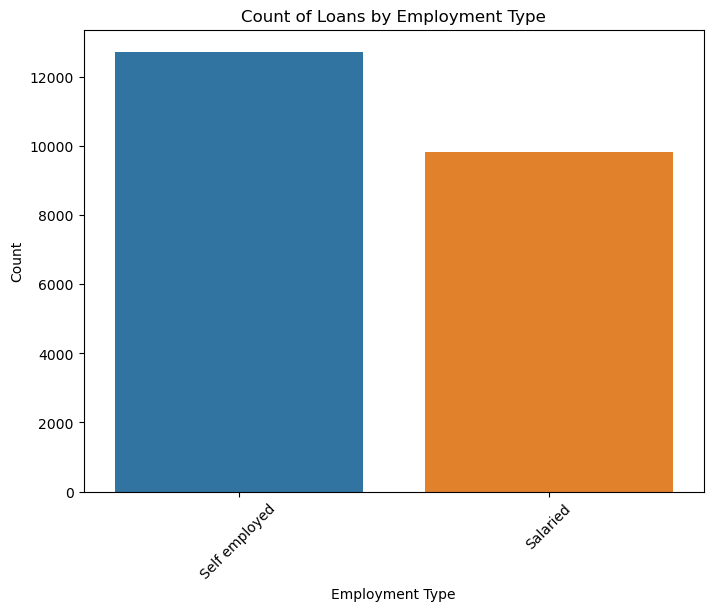

In [12]:
# Employment Type count
plt.figure(figsize=(8, 6))
sns.countplot(x='Employment_Type', data=newMergedDf)
plt.title('Count of Loans by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

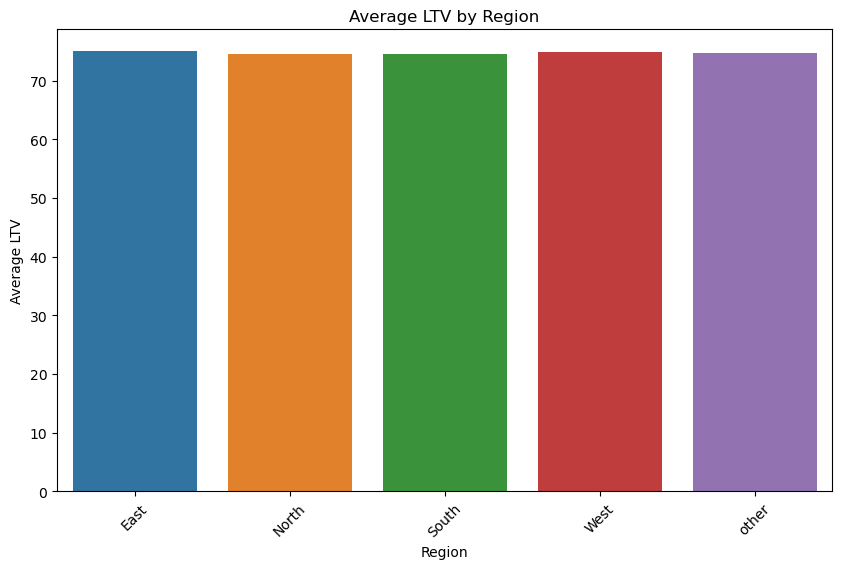

In [13]:
# Average LTV by Region
avg_ltv_by_region = newMergedDf.groupby('Region')['ltv'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='ltv', data=avg_ltv_by_region)
plt.title('Average LTV by Region')
plt.xlabel('Region')
plt.ylabel('Average LTV')
plt.xticks(rotation=45)
plt.show()

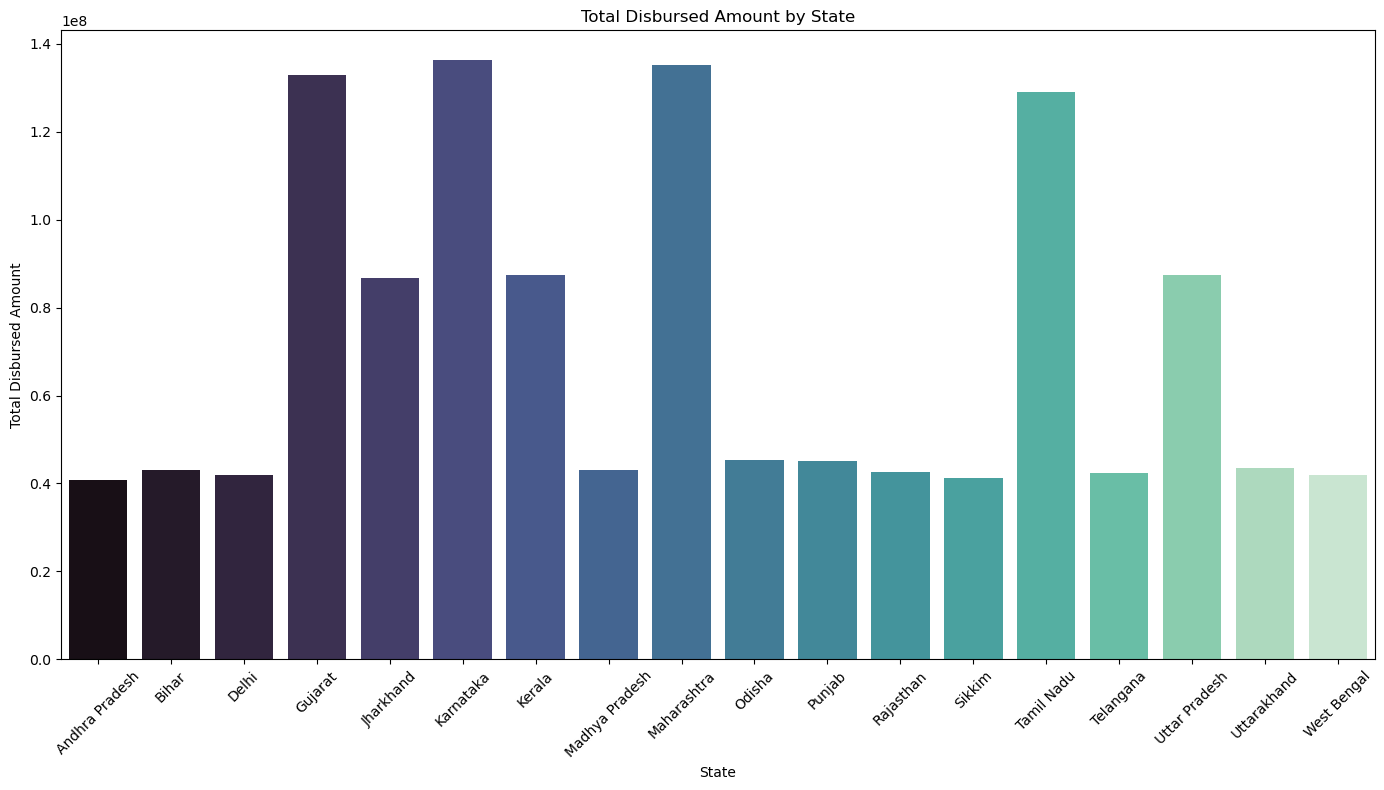

In [14]:
# Calculate total disbursed amount by state
total_disbursed_by_state = newMergedDf.groupby('State_Name')['Disbursed_Amount'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='State_Name', y='Disbursed_Amount', data=total_disbursed_by_state, palette='mako')
plt.title('Total Disbursed Amount by State')
plt.xlabel('State')
plt.ylabel('Total Disbursed Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

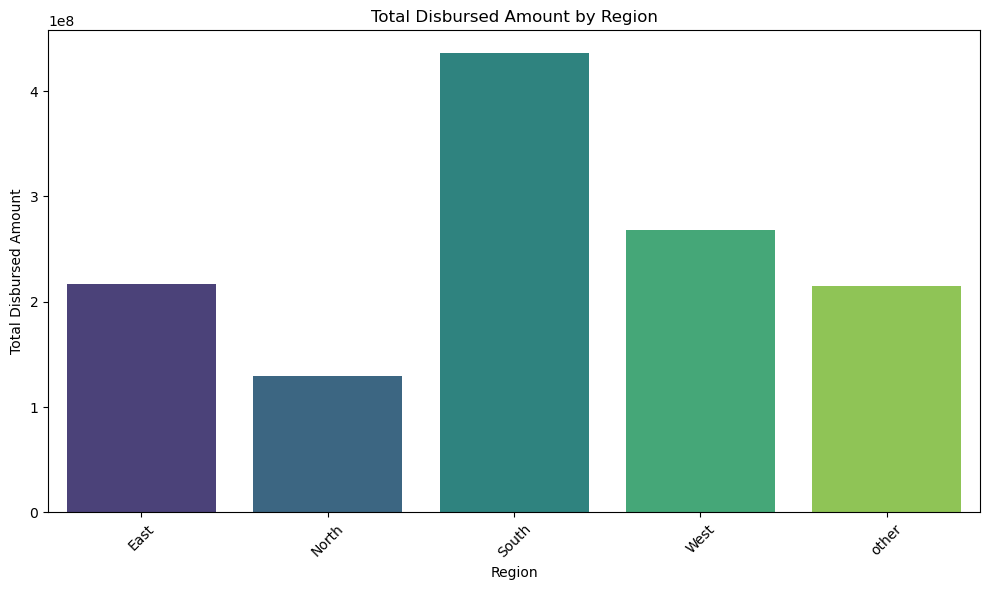

In [17]:
# Calculate total disbursed amount by region
total_disbursed_by_region = newMergedDf.groupby('Region')['Disbursed_Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Disbursed_Amount', data=total_disbursed_by_region, palette='viridis')
plt.title('Total Disbursed Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Disbursed Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

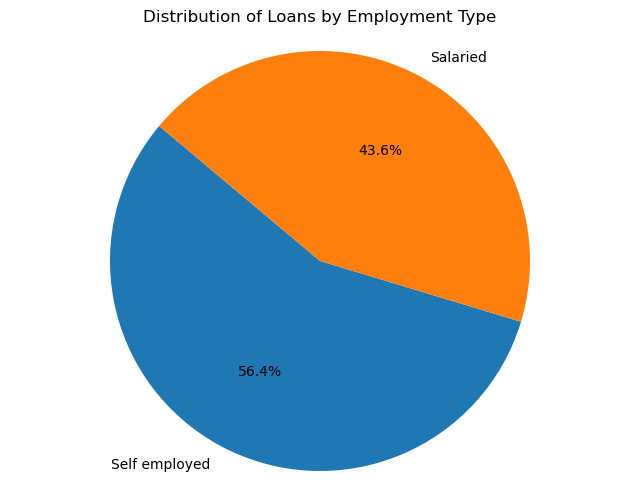

In [16]:
employment_counts = newMergedDf['Employment_Type'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(8, 6))  
plt.pie(employment_counts, labels=employment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Loans by Employment Type')
plt.axis('equal')  
plt.show()